# Майнор по Анализу Данных, Группа ИАД-5
## 07/12/2017 Проверка гипотез

In [2]:
!pip install seaborn

  Running setup.py bdist_wheel for seaborn: started
  Running setup.py bdist_wheel for seaborn: finished with status 'done'
  Stored in directory: C:\Users\Artem\AppData\Local\pip\Cache\wheels\29\af\4b\ac6b04ec3e2da1a450e74c6a0e86ade83807b4aaf40466ecda
Successfully built seaborn


In [2]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [3]:
hockey_data = pd.read_csv('hockey_players.csv', 
                          index_col=0)

In [4]:
hockey_data.shape

(6292, 12)

In [5]:
hockey_data.head()

,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
year,,,,,,,,,,,,
2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


**Гистограммы роста и веса хоккеистов**

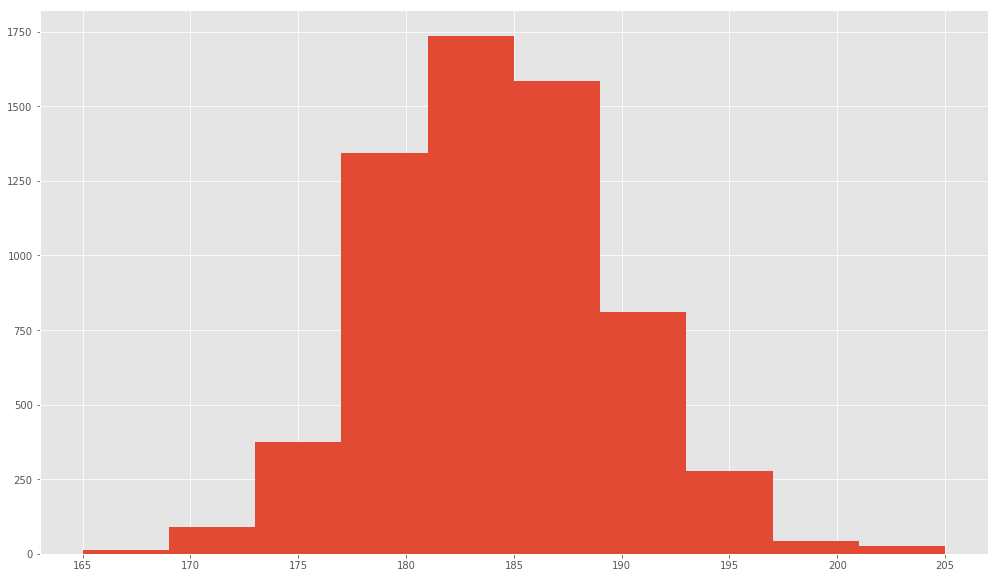

In [8]:
plt.figure(figsize=(17,10))
hockey_data['height'].hist();

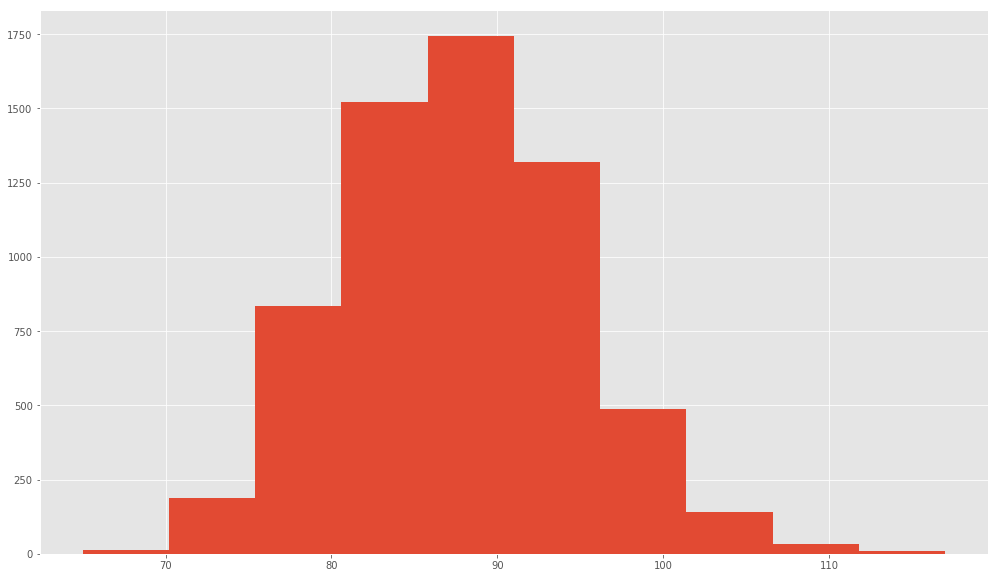

In [9]:
plt.figure(figsize=(17,10))
hockey_data['weight'].hist();

**Проверим, отличается ли средний рост хоккеистов значимо от 177.6 см  – среднего мужского роста по Европе за 2001-2012 ([Вики](https://en.wikipedia.org/wiki/List_of_average_human_height_worldwide#cite_note-role_of_nutrition_and_genetics-13)), а средний вес – от 81.9 кг. (среднее по Швеции за 2003-2004, [Вики](https://en.wikipedia.org/wiki/Human_body_weight#cite_note-6)).**

**Для использования критерия Стьюдента сначала убедимся, что данные хорошо описываются нормальным распределением.**

**Постройте [QQ-график](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) для роста хоккеистов (метод stats.probplot).**

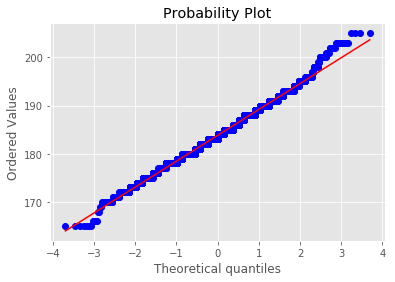

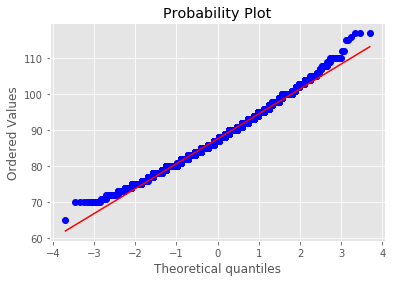

In [13]:
plt.figure(figsize=(17,10))

# проверим рост
fig, ax = plt.subplots(1,1)
qq, line = stats.probplot(hockey_data.height, plot=ax)

# проверим вес
fig, ax = plt.subplots(1,1)
qq, line = stats.probplot(hockey_data.weight, plot=ax)


Теперь можно пробовать статистические тесты

**Постройте 95% доверительные интервалы для роста и веса хоккеистов на основе нормального распределения по правилу 2 сигм.**

In [14]:
from statsmodels.stats.weightstats import *

In [15]:
from statsmodels.stats.weightstats import _zconfint_generic
from statsmodels.stats.weightstats import _tconfint_generic

In [16]:
_zconfint_generic(np.mean(hockey_data.weight), np.std(hockey_data.weight), alpha=0.95, alternative='2s'),
_zconfint_generic(np.mean(hockey_data.height), np.std(hockey_data.height), alpha=0.95, alternative='2s')

(183.4739291343478, 184.1490842159383)

## Одновыборочный критерий Стьюдента

**Проверьте с помощью t-критерия Стьюдента, что средний рост хоккеистов отличается от 177.6 см, а средний вес – от 81.9 кг. (среднее по Швеции за 2003-2004). Метод stats.ttest_1samp**

In [17]:
stats.ttest_1samp(hockey_data.height, 177.6), stats.ttest_1samp(hockey_data.height, np.mean(hockey_data.height)),
stats.ttest_1samp(hockey_data.weight, 81.9), stats.ttest_1samp(hockey_data.weight, np.mean(hockey_data.weight))

(Ttest_1sampResult(statistic=65.172677534166439, pvalue=0.0),
 Ttest_1sampResult(statistic=0.0, pvalue=1.0))

**Проверьте с помощью t-критерия Стьюдента, отличается ли средний вес хоккеистов значимо от среднего мужского веса по США за 2003-2006 – от 88.3 кг.**

In [18]:
# Your Code Here

## Двухвыборочный критерий Стьюдента (независимые выборки)

**Нарисуйте на одной картинке 3 гистограммы распределения веса – для вратарей, защитников и нападающих. Используйте параметры color и alpha (прозрачность), чтоб гистограммы можно было различить.**

Колонка **"position"**. 

Значения:
* F - Forward
* D - Defender
* G - Goalkeeper

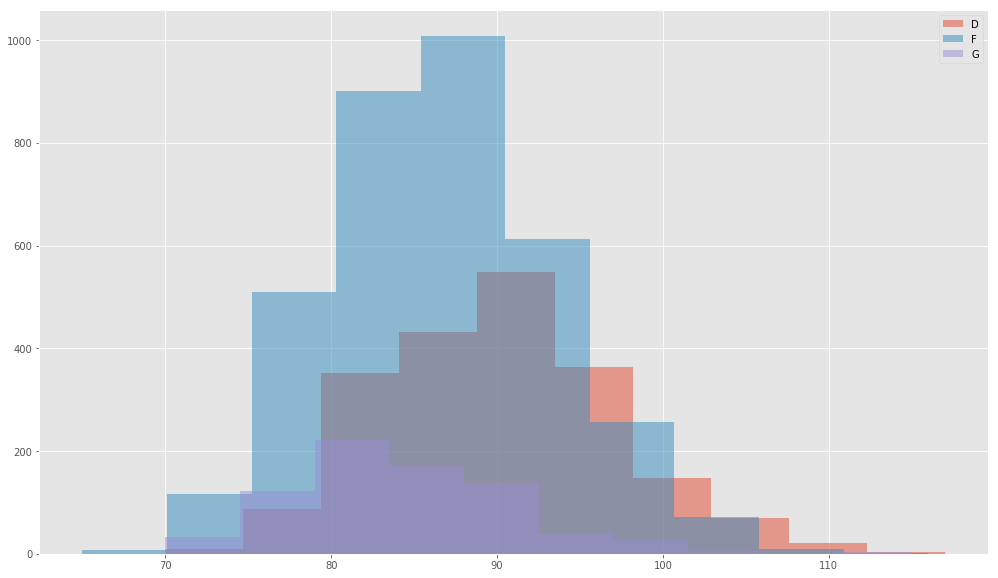

In [20]:
plt.figure(figsize=(17,10))
D_weights = hockey_data.query('position == "D"').weight
F_weights = hockey_data.query('position == "F"').weight
G_weights = hockey_data.query('position == "G"').weight

plt.hist(D_weights, alpha=0.5, label='D')
plt.hist(F_weights, alpha=0.5, label='F')
plt.hist(G_weights, alpha=0.5, label='G')
plt.legend()

**Также постройте boxplot со статистиками сразу трех распределений (указанных выше), это можно сделать одной командой.**

**Подсказка: **seaborn =)

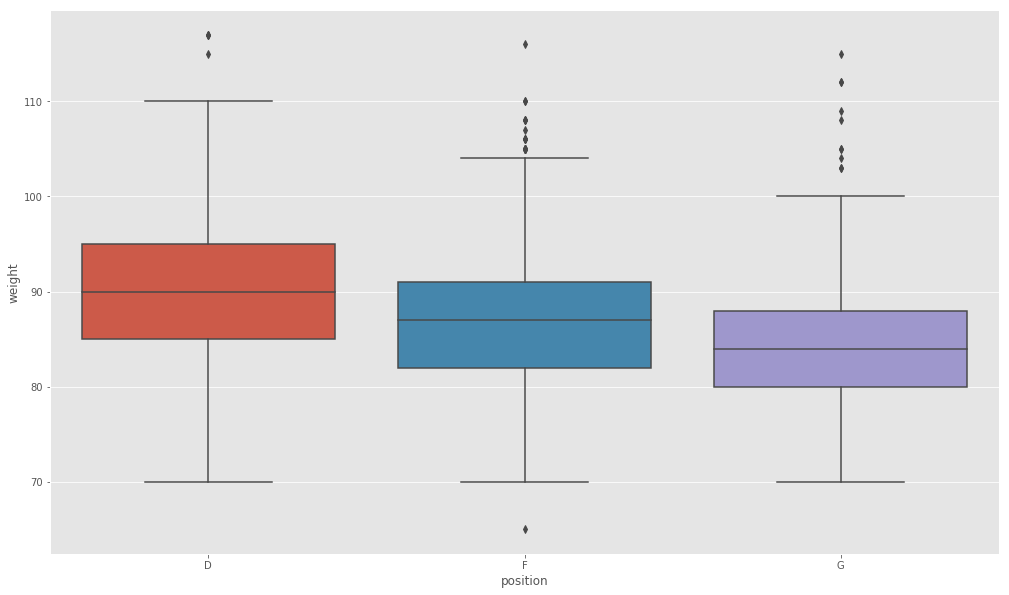

In [25]:
plt.figure(figsize=(17,10))
sns.boxplot(x="position", y="weight", data=hockey_data)

**Проверьте гипотезы, что средний вес защитников выше, чем у вратарей и нападающих. Метод stats.ttest_ind**

In [31]:
stats.ttest_ind(D_weights, G_weights), stats.ttest_ind(D_weights, F_weights)

(Ttest_indResult(statistic=19.853958225444472, pvalue=3.6208402726480883e-82),
 Ttest_indResult(statistic=17.119397422055677, pvalue=4.6521208815554334e-64))

# Полезные ссылки

* [Исходная статья с анализом показателей хоккеистов с хабра](https://habrahabr.ru/post/301340/)
* [Датасет с хоккеистами](https://figshare.com/articles/Height_of_ice_hockey_players/3394735/2)
* [Годная статья про QQ-plot (Propability Plot)](http://desktop.arcgis.com/ru/arcmap/10.4/extensions/geostatistical-analyst/normal-qq-plot-and-general-qq-plot.htm)

#### Автор материала: старший преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.